In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [4]:
def sentiment_adjusted_smart_money(df, window=60):
    """
    基于市场情绪的聪明钱因子
    - 使用价格方向比例作为情绪指标，调整聪明钱效应
    """
    close = df['close']
    taker_volume = df['taker_buy_volume']
    
    # 市场情绪：上涨K线比例
    market_sentiment = (close > df['open']).rolling(window).mean()
    
    price_diff = close.diff()
    taker_ratio = taker_volume / df['volume'].replace(0, 1e-12)
    
    gain = (price_diff * taker_ratio).where(price_diff > 0, 0)
    loss = (-price_diff * (1 - taker_ratio)).where(price_diff < 0, 0)
    
    sum_gain = gain.rolling(window).sum()
    sum_loss = loss.rolling(window).sum()
    
    # 情绪调整：乘以市场情绪因子
    factor = (sum_gain - sum_loss) * market_sentiment
    
    return factor

# 因子测试

In [5]:
evaluator.set_factor(
    factor_func=sentiment_adjusted_smart_money,
    factor_name='sentiment_adjusted_smart_money'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.008559
   Rank_IC (Spearman): -0.025163
📊 信息比率:
   IR: 0.075829
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130881
   因子列: sentiment_adjusted_smart_money
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


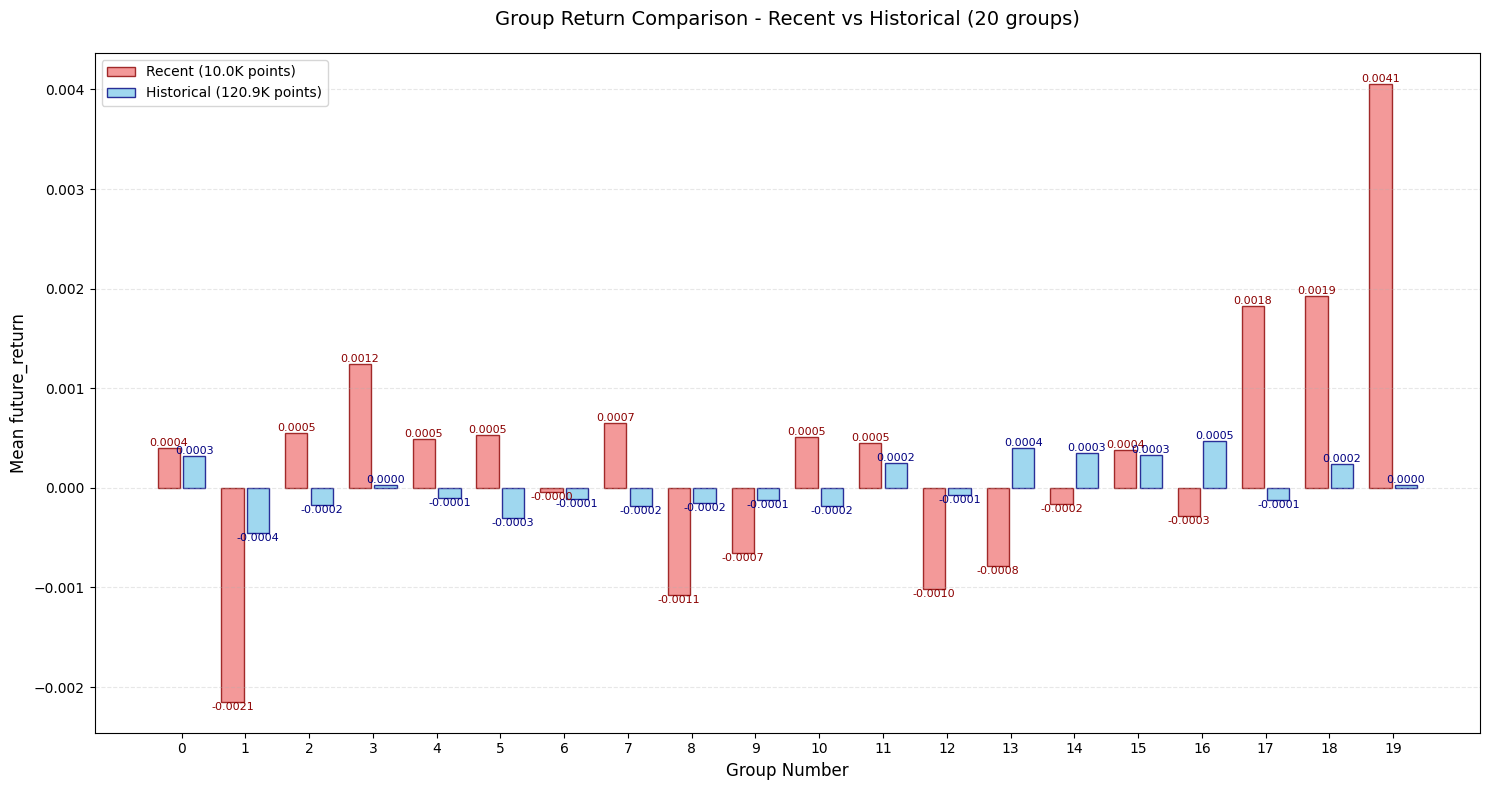

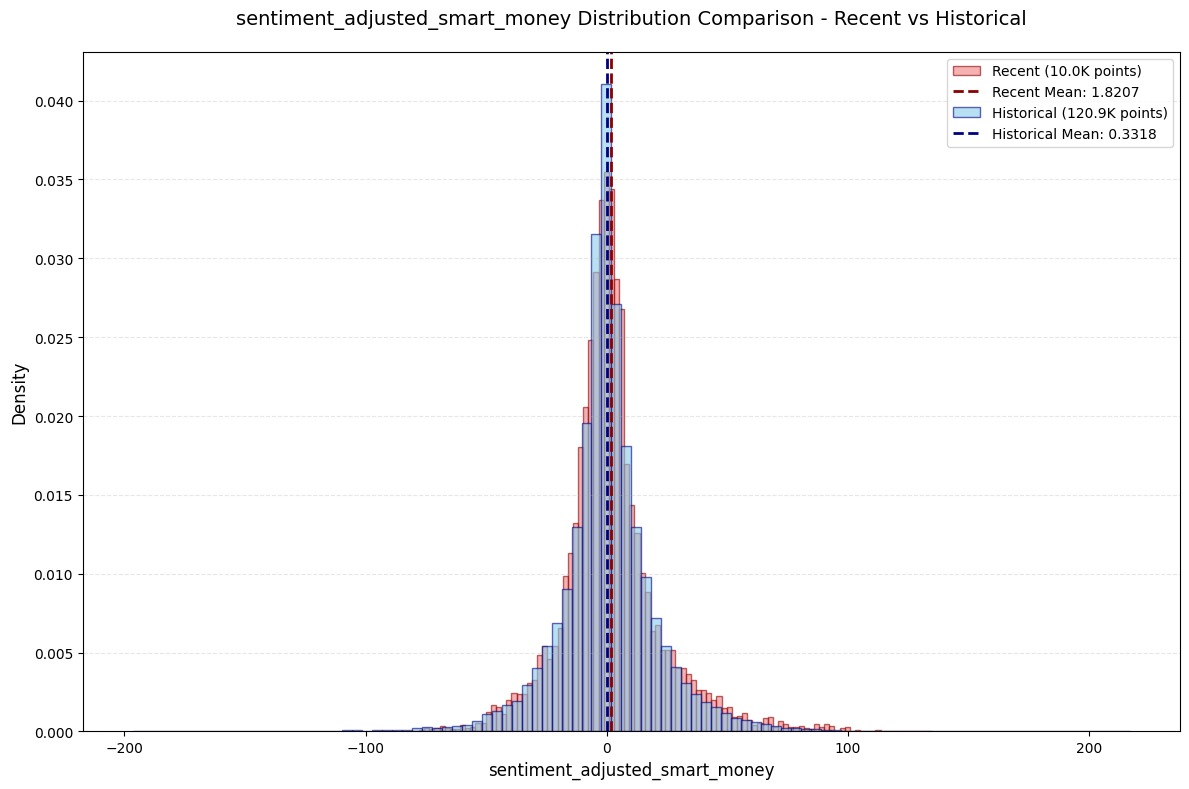

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [6]:
result=evaluator.run_full_evaluation(run_stationarity_test=False)

In [7]:
print(result)

{'correlation_analysis': {'IC': 0.008559394819894931, 'Rank_IC': -0.02516270273468061}, 'information_ratio': {'IR': 0.07582908180431008, 'group_correlations': [-0.036114892851846436, 0.005202325866774749, -0.015998962768479195, 0.005723869528022649, 0.004639931707387985, 0.019110885648679493, 0.022093573144862554, 0.002607214817916317, -0.011791500825852194, 0.01750849824068165], 'n_groups': 10}, 'group_analysis': {'group_stats':         val_min  val_max  val_mean  return_mean  return_std  count
group                                                             
0     -196.5828 -31.2273  -48.1890       0.0004      0.0192   6545
1      -31.2261 -21.1435  -25.6228      -0.0006      0.0146   6544
2      -21.1420 -15.0010  -17.8642      -0.0001      0.0132   6544
3      -15.0008 -11.0132  -12.9090       0.0001      0.0120   6544
4      -11.0128  -8.1176   -9.4975      -0.0001      0.0111   6544
5       -8.1161  -5.8972   -6.9678      -0.0002      0.0107   6544
6       -5.8970  -4.1489   -4.